In [1]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_44/2134287553.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv('project1.data')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [10]:
data.shape

(398, 9)

In [14]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [55]:
# data['horsepower'].astype(float)
horsepower_avg = data[data['horsepower'] != '?']['horsepower'].astype(float).median()
horsepower_avg
data.loc[data['horsepower'] == '?',['horsepower']] = horsepower_avg

data['horsepower'] = data['horsepower'].astype(float)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f541982bdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f54198b6090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f541982ab10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f54198b7510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f54198b5610>],
 'means': []}

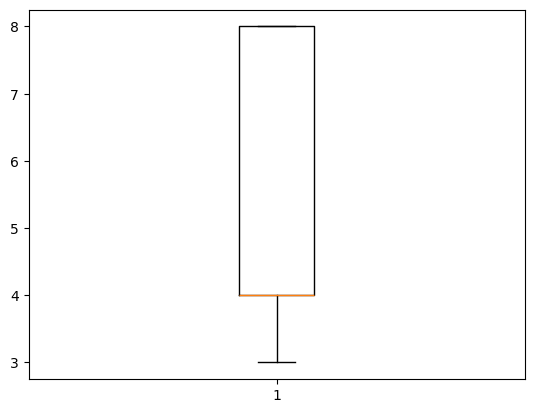

In [63]:
plt.boxplot(data['cylinders'])

In [116]:
keys = data.keys()
keys = keys.to_list()
keys.remove('car_name')
keys.remove('weight')
print(keys)

['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin']


In [117]:
for key in keys:
    print(key)
    for subkey in keys:
        if subkey is not key:
            plt.scatter(data[key], data[subkey], label=subkey)
    plt.xlabel(key)
    plt.legend()
    plt.savefig('figures/'+key+'_indep.png', bbox_inches='tight')
    plt.close()

# use corr matrix?

mpg
cylinders
displacement
horsepower
acceleration
model_year
origin
